In [ ]:
import pandas as pd
import geopandas as gpd
import requests

In [ ]:
df_productos = pd.read_csv(r'C:\Users\roberto.villar\Downloads\productos.csv', sep=';',encoding = "ISO-8859-1")

df_precios = pd.read_csv(r'C:\Users\roberto.villar\Downloads\precios_2021.csv', header=None)

In [96]:
df_establecimientos = pd.read_csv(r'C:\Users\roberto.villar\Downloads\establecimiento.csv', sep=';',encoding = "ISO-8859-1")
df_establecimientos['long'] = df_establecimientos.long.str.replace('.','',1)
df_establecimientos['long'] = df_establecimientos.long.str.replace(',','.',1).astype(float)
df_establecimientos['lat'] = df_establecimientos.lat.str.replace('.','',1)
df_establecimientos['lat'] = df_establecimientos.lat.str.replace(',','.').astype(float)

# 

In [ ]:
url = 'https://catalogodatos.gub.uy/dataset/9bfa6e97-f40f-437e-aa13-a3406c50f762/resource/3c1b430a-c010-4db1-880d-bdc0f11e4ce9/download/departamentos.geojson'
r = requests.get(url)
print(r.status_code)

bytes_ = open('limits_uru.geojson', 'wb').write(r.content)

In [101]:
#read in once
df_places = gpd.read_file('limits_uru.geojson')
df_places.head()
# ax = df_places.plot()
# df_places.geometry
# for x, y, label in zip(df_places.geometry.x, df_places.geometry.y, df_places.admlnm):
#     ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

,FID,Id,admlnm,iso3cd,bdytyp,admlcd,datsor,geometry
0,0,0,Treinta y tres,URU,1,URUUYTT,21/06/2019,"MULTILINESTRING ((-54.12984 -33.45976, -54.129..."
1,1,0,Tacuarembo,URU,1,URUUYTA,21/06/2019,"MULTILINESTRING ((-56.18244 -31.25224, -56.182..."
2,2,0,Soriano,URU,1,URUUYSO,21/06/2019,"MULTILINESTRING ((-57.09227 -33.95468, -57.092..."
3,3,0,San Jose,URU,1,URUUYSJ,21/06/2019,"MULTILINESTRING ((-56.35753 -34.78254, -56.357..."
4,4,0,Rocha,URU,1,URUUYRO,21/06/2019,"MULTILINESTRING ((-53.58277 -33.47985, -53.582..."


In [124]:
# df_establecimientos
geometry = gpd.points_from_xy(df_establecimientos.long, df_establecimientos.lat)
df_establecimientos['geometry'] = geometry

<Axes: >

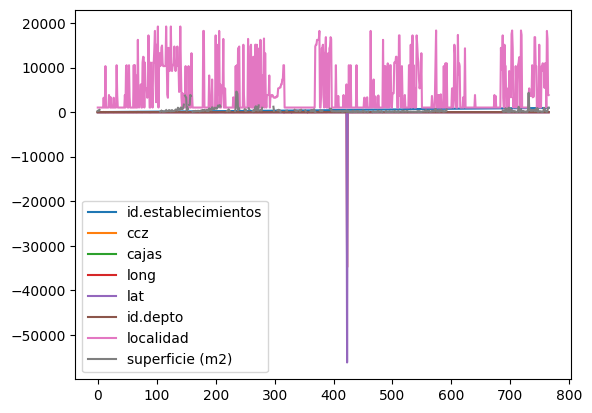

In [126]:
df_establecimientos.plot()

In [99]:
gdf = gpd.GeoDataFrame(
    df_establecimientos, geometry=gpd.points_from_xy(df_establecimientos.long, df_establecimientos.lat), crs="EPSG:4326"
)
gdf
# gdf.plot()

,id.establecimientos,razon.social,nombre.sucursal,direccion,ccz,barrio,cajas,cadena,long,lat,ciudad,depto,id.depto,localidad,superficie (m2),geometry
0,1,CAFITUR S.A.,Expres 2,AVDA. MILLAN 2683,16.0,Reducto,2,Sin Cadena,-34.876567,-56.189722,Montevideo,Montevideo,1,1020,280.0,POINT (-34.87657 -56.18972)
1,2,Distren S.A.,Expres 6,Conciliación 3910,14.0,La Teja,3,Sin Cadena,-34.864832,-56.220467,Montevideo,Montevideo,1,1020,340.0,POINT (-34.86483 -56.22047)
2,3,Distren S.A.,Expres 7,Carlos Maria Ramirez 186,14.0,Belvedere,3,Sin Cadena,-34.860849,-56.227026,Montevideo,Montevideo,1,1020,295.0,POINT (-34.86085 -56.22703)
3,4,Distren S.A.,Expres 1,Dr. Martín Berinduague 870,14.0,La Teja,5,Sin Cadena,-34.869021,-56.231560,Montevideo,Montevideo,1,1020,480.0,POINT (-34.86902 -56.23156)
4,5,Daltiro S.A.,El Clon - Comercio,Avda. 8 de Octubre 3631,6.0,Unión,3,El Clon,-34.876518,-56.145605,Montevideo,Montevideo,1,1020,NaN,POINT (-34.87652 -56.14560)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,924,Coboe S.A.,Farmashop 119,Carlos Maria Ramirez 1851,NaN,Cerro,2,Farmashop,-34.874421,-56.254233,Montevideo,Montevideo,1,1020,100.0,POINT (-34.87442 -56.25423)
762,925,Coboe S.A.,Farmashop 126,Av. Pablo Ríos 149,NaN,Interior,2,Farmashop,-31.725811,-55.972360,Tacuarembó,Tacuarembó,18,18220,70.0,POINT (-31.72581 -55.97236)
763,926,Coboe S.A.,Farmashop 127,Wilson Ferreira Aldunate y José Enrique Rodó,NaN,Interior,2,Farmashop,-34.637669,-56.620633,Libertad,San José,16,16421,300.0,POINT (-34.63767 -56.62063)
764,927,Domiral S.A.,Supermercado Imperio del Ete,"Ruta Interbalnearia km 36,700",NaN,Interior,5,Sin Cadena,-34.778630,-55.857190,Pinamar,Canelones,3,3959,1000.0,POINT (-34.77863 -55.85719)


In [ ]:
df_establecimientos.head()

In [ ]:
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt

sf = shp.Reader("test.shp")

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

In [ ]:
df_precios.columns = ['ID_PrecioDiario',
'Declaración',
'Fecha',
'Fechaanterior',
'Oferta ',
'Precio' ,
'PrecioAnterior',
'Público',
'id.establecimientos',
'Feria_id',
'id.producto']
